# Ford GO Bike Trip Analysis.
## by Chennel Williams

## Preliminary Wrangling

This dataset is about a bike share service called 'Ford GO Bike'. It includes trip times, bike station locations, gender of bikers and much more.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
#read data and get a first look 
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [6]:
#getting info on each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

I'm interested in finding out what the average user of the service is like. I'll be able to paint that picture based off of their gender, age and if they are a subscriber or not.

### What is the structure of your dataset?

The data is made up of 183412 riders with 15 features. 

### What is/are the main feature(s) of interest in your dataset?
I would like to build a profile for what the average user is like. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features for gender, user type, duration, and birth year and if they use the bike share for their entire journey will be best for creating the profile.  

## Univariate Exploration

> I'll first look at which gender uses the service more:

In [221]:
#create a sample of the data
np.random.seed(20)
sample=np.random.choice(df.shape[0], 100, replace=False)
subset=df.loc[sample]

In [295]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

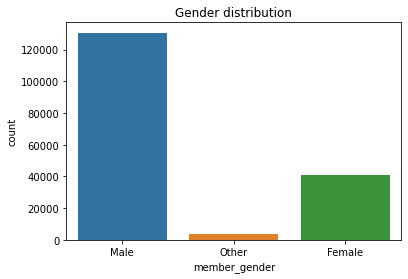

In [308]:
#create a graph for member_gender:
sb.countplot(data = df, x='member_gender');
plt.title('Gender distribution');

Based on the graph, more males used the bike share service than females. 

In [296]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

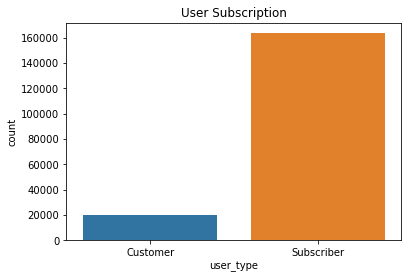

In [304]:
#create a graph for user_type:
sb.countplot(data = df, x='user_type');
plt.title('User Subscription');

More than 87% of the users are subscribers to the bike share service 

In [42]:
#get the stats for birth year
df.member_birth_year.describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

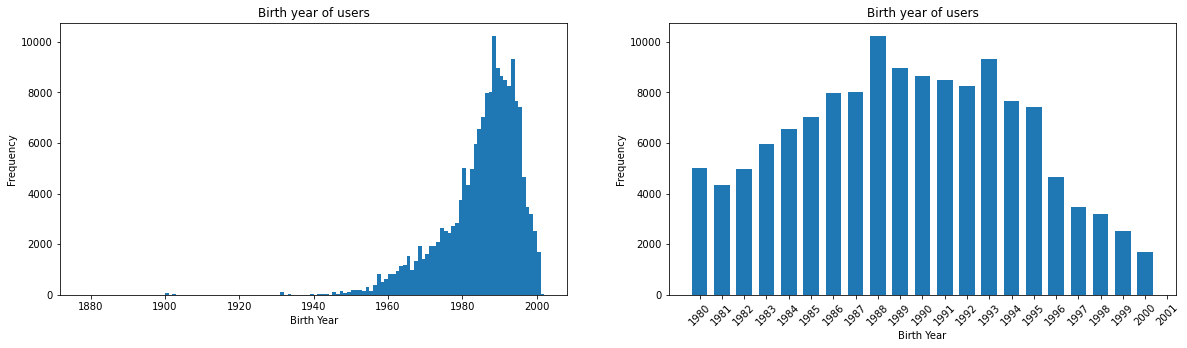

In [299]:
#create a graph for birth_year:
plt.figure(figsize=[20, 5])

#plot 1
plt.subplot(1,2,1)
bins=np.arange(1878, 2001+1.1, 1)
plt.hist(data=df, x='member_birth_year', bins=bins);
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.title('Birth year of users');

#plot 2
plt.subplot(1,2, 2)
bins=np.arange(1980, 2001+1, 1) - 0.5
plt.hist(data=df, x='member_birth_year', bins=bins, rwidth=0.7);
plt.xticks(np.arange(1980,2001+1,1), rotation=45)
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.title('Birth year of users');

It's safe to safe that majority of the users are approximately 33 years old.

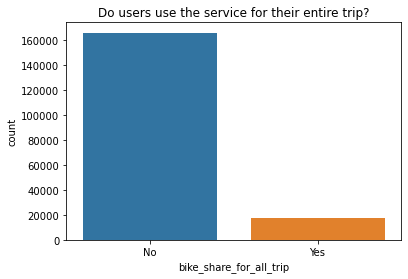

In [301]:
#create a graph for bike_share_for_all_trip:
sb.countplot(data = df, x='bike_share_for_all_trip');
plt.title('Do users use the service for their entire trip?');

A significant portion of the users do not use the service for the entirey of their trip.

>Based on my analysis thus far, I can deduce that the average bike share user is a 33 year old, male subscriber who uses the service for only a portion of his trip. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The distributions for gender and birth year are biomodal. I took a closer look at the birth year s to see exactly which year was most frequent.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I looked at the statistical distribution of the birth years to get an idea of how to plot the histogram. 

## Bivariate Exploration

> In this section I will be exploring any relationships between the features of the profile.

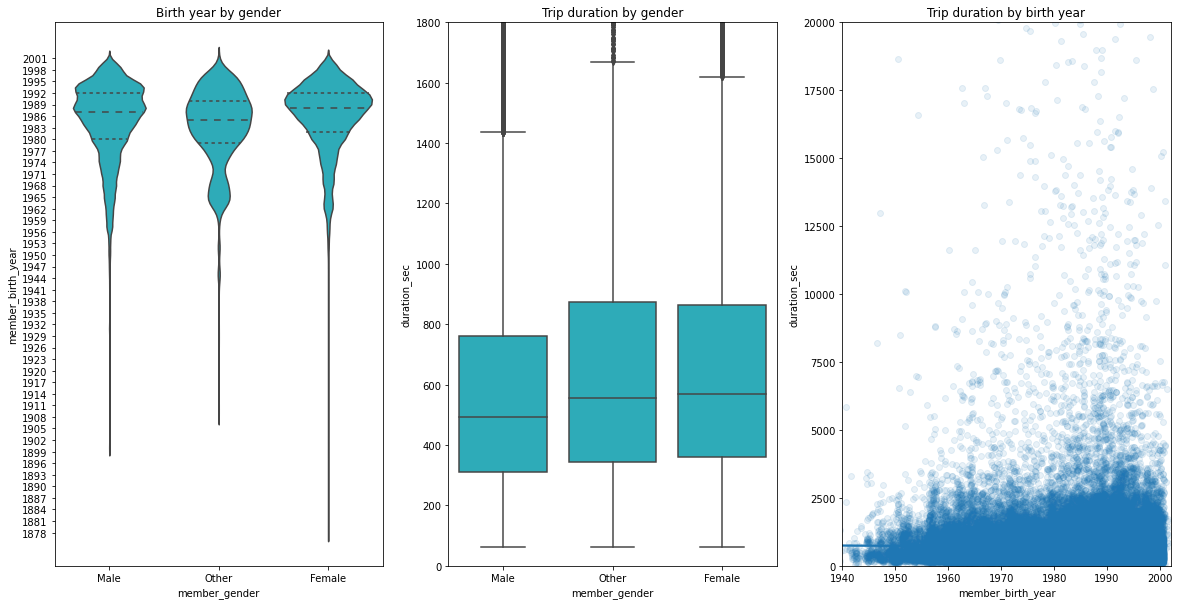

In [139]:
#plotting three figures
plt.figure(figsize=[20, 10])
color = sb.color_palette()[9]

#violoinplot on the left
plt.subplot(1,3,1)
sb.violinplot(data=df, x='member_gender', y='member_birth_year', color=color, inner='quartiles')
plt.yticks(np.arange(1878, 2001+3, 3))
plt.title('Birth year by gender')

#boxplot in the middle
plt.subplot(1,3,2)
sb.boxplot(data=df, x ='member_gender', y='duration_sec', color=color)
plt.ylim(0,1800)
plt.title('Trip duration by gender')

#violinplot for user_type and trip time
plt.subplot(1,3,3)
sb.regplot(data=df, x='member_birth_year', y='duration_sec', x_jitter=0.7, scatter_kws={'alpha':1/10})
plt.xlim(1940, 2002)
plt.ylim(0, 20000)
plt.title('Trip duration by birth year');

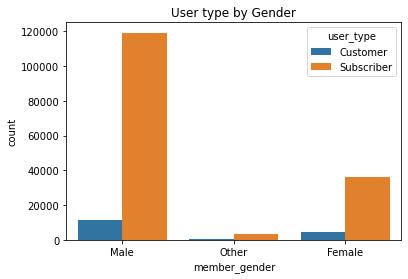

In [298]:
#plot gender and user type
sb.countplot(data=df, x='member_gender', hue='user_type');
plt.title('User type by Gender');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The violin plot shows that age range of the average customer, regardless of their gender identity, is between 32-35 years.

> The box plot shows that females had longer trip times than males with the median female trip time being approximately 575 seconds. The median male trip time is approximately 500 seconds. So, even though there are more males who use the bike share service, they use it for shorter time periods than the females who use the service. 

> The scatter plot shows that the younger users have longer trip times compared to older users. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is an interesting relationship between gender and user type. Men make up about 72% of the subscribers even though females use the service for longer periods of time.

## Multivariate Exploration

> I'll be looking at the age distribution amongst the genders in relation to how long their trips take as well as if younger people choose to use more than one modes of transport for their trips.

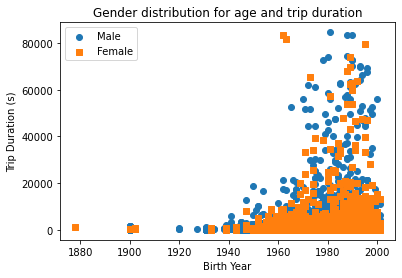

In [175]:
#plot age distribution by gender and trip time
gender_markers = [['Male', 'o'],
               ['Female', 's']]

for gender, marker in gender_markers:
    df_gen = df[df['member_gender'] == gender]
    plt.scatter(data = df_gen, x = 'member_birth_year', y = 'duration_sec', marker = marker)
plt.legend(['Male','Female'])
plt.xlabel('Birth Year')
plt.ylabel('Trip Duration (s)')
plt.title('Gender distribution for age and trip duration');

Even though males make up majority of the users, there is a wider distribution of females from various age groups compared to males. 

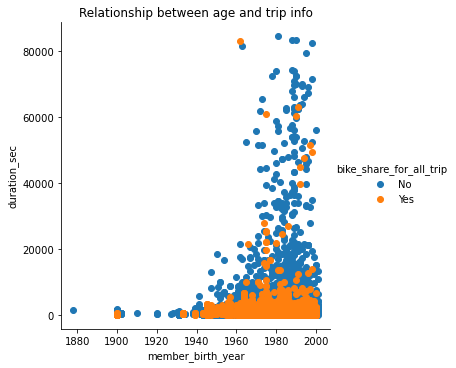

In [302]:
#plot age by trip time and if they used the service for entire trip
g = sb.FacetGrid(data = df, hue = 'bike_share_for_all_trip', height= 5)
g.map(plt.scatter, 'member_birth_year', 'duration_sec')
g.add_legend();
plt.title('Relationship between age and trip info');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> More males than females use the service but the females that do belong to wider age groups compared to the males mainly being 54 and younger. There is also a significant relationship between the age of the user, how long they use the service and if they use it for all of their trips. It is seen that the younger persons opted to only use the bike service for a portion of their trip.

### Were there any interesting or surprising interactions between features?

> I found it very interesting there were more occurences of the bike share service not being used for the entire trip, as the trip duration increased. 